## 
Andrew Ng’s Machine Learning Course in Python

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# import seaborn as sns

In [66]:
size = 1000
np.random.seed(12356)
data = np.random.rand(size,2)
label = np.zeros(size)
noise = np.random.normal(0,0.1,size)
noise.shape = [1000, 1]

for i in range(len(data)):
    res = data[i][1] + data[i][0] + noise[i]
    #  y = 1 - x     
    if res > 1:
        label[i] = 1
    else:
        label[i] = 0

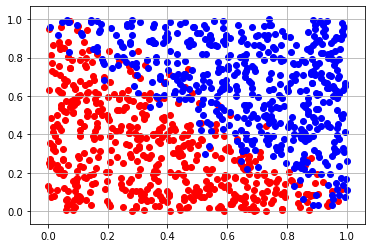

In [67]:
fig, ax = plt.subplots()
ax.scatter(data[lable==0,0], data[lable==0,1], c='red')
ax.scatter(data[lable==1,0], data[lable==1,1], c='blue')
ax.grid(True)
plt.show()

### Sigmoid function:
```
h_theta(x) = 1 / (1 + exp(-(theta.T*x))
```

In [68]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    return 1. / (1 + np.exp(-z))
# testing the sigmoid function
sigmoid(0)

0.5

### Cost function of logistic regression:
```
Cost = y * h_theta(x) + (1-y) * (1 - h_theta(x))
```
To compute the cost function J(Θ) and gradient (partial derivative of J(Θ) with respect to each Θ)

In [69]:
def costFunction(theta,X,y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    m = len(y)
    predictions = sigmoid(np.dot(X,theta)) 
    # x0*theta0 + x1*theta1 + x2*theta2 + ...
    # x0 = 1
    error = - ((y * np.log(predictions)) + ((1-y)*np.log(1-predictions)))
    cost = 1/m * sum(error)
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    return cost[0] , grad

#### Setting the initial_theta and test the cost function:

In [70]:
m , n = data.shape[0], data.shape[1]
X = np.append(np.ones((m,1)),data,axis=1)
y = label.reshape(m, 1)
initial_theta = np.ones((n+1,1)) # no. of theta = number of variable + 1
cost, grad = cost_function(initial_theta, X, y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros): \n",grad)

# print("Cost of initial theta is",cost)
# print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.9960072809214772
Gradient at initial theta (zeros): 
 [[0.38553007]
 [0.12705161]
 [0.11263369]]


* Before doing gradient descent, never forget to do feature scaling for a multivariate problem

But, the data in this case is already normalised

In [71]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta , J_history

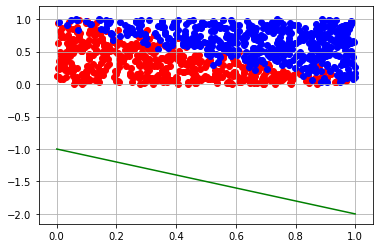

In [72]:
# Before using gradient decent
fig, ax = plt.subplots()
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value= -(initial_theta[0] +initial_theta[1] * x_value)/initial_theta[2]
# print(y_value)
ax.plot(x_value,y_value, "g")

ax.scatter(data[lable==0,0], data[lable==0,1], c='red')
ax.scatter(data[lable==1,0], data[lable==1,1], c='blue')
ax.grid(True)
plt.show()

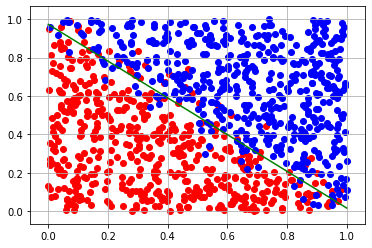

In [73]:
# After using gradient decent
alpha=1 
num_iters=400

theta, J_history = gradientDescent(X,y,initial_theta,alpha,num_iters)

fig, ax = plt.subplots()
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value= -(theta[0] +theta[1]*x_value)/theta[2]
# print(y_value)
ax.plot(x_value,y_value, "g")

ax.scatter(data[lable==0,0], data[lable==0,1], c='red')
ax.scatter(data[lable==1,0], data[lable==1,1], c='blue')
ax.grid(True)
plt.show()

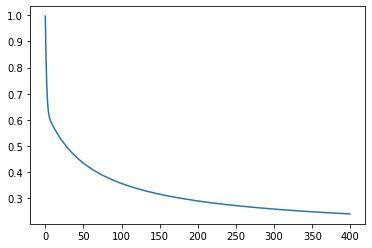

In [74]:
# plot the Cost history
x = range(len(J_history))
plt.plot(x, J_history)

Reference:

https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb